## **CONSUMER ELECTRONIC SALES**

---


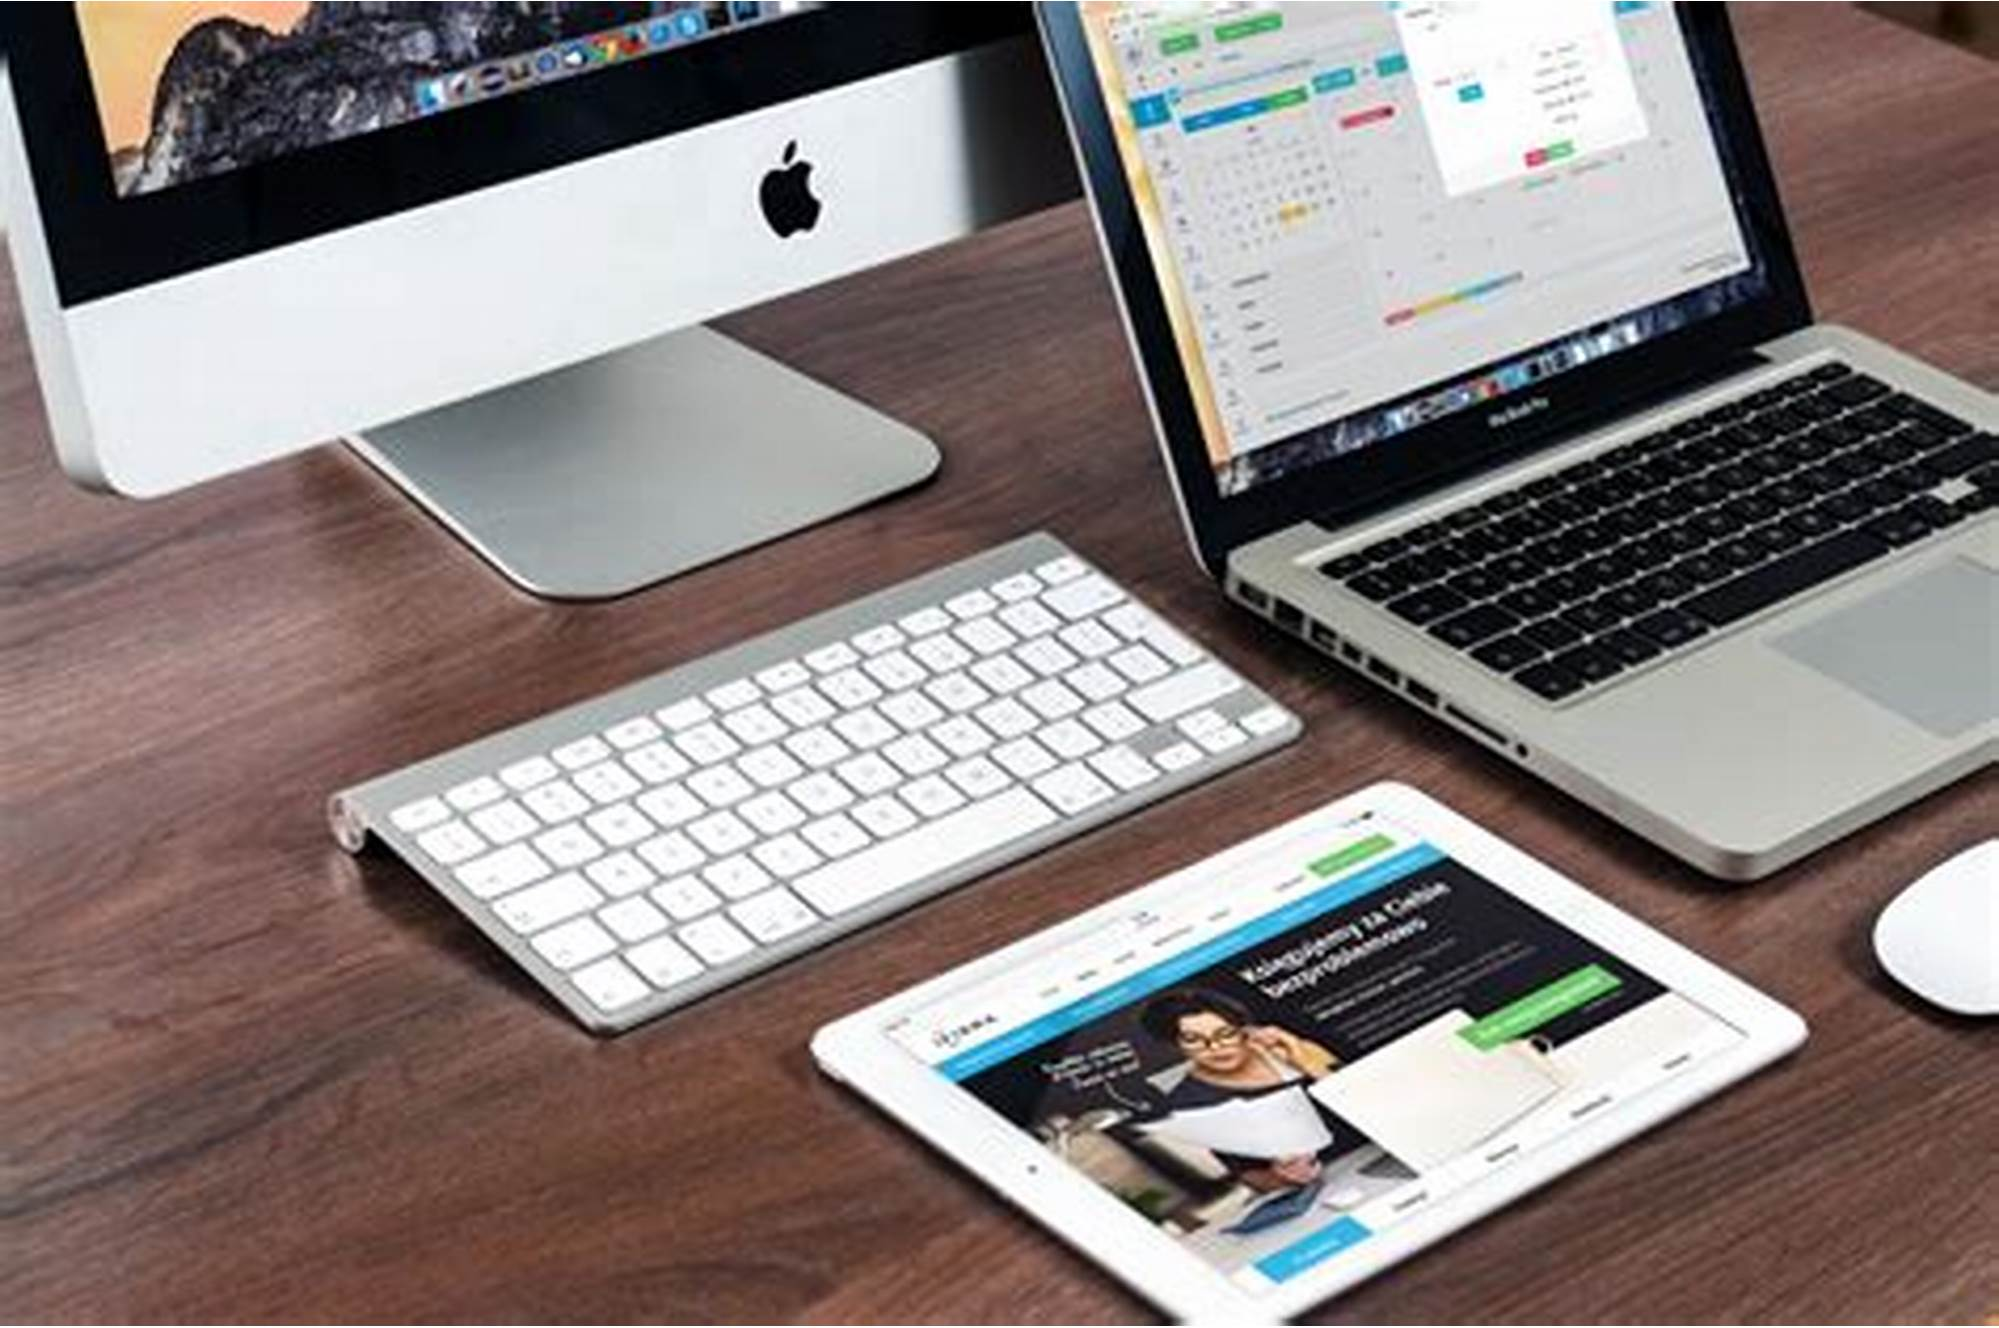

## 1. IMPORT DATABASE

    (Pandas and Numpy environment)

In [387]:
# IMPORT THE REQUIRED LIBRARIES
import pandas as pd               # Structured data management (Dataframe)
import numpy as np                # Matrix management
import matplotlib.pyplot as plt   # Graphs
import plotly.express as px
import seaborn as sns             # Graphs
print(pd.__version__)

2.2.2


It aims to analyze factors influencing purchase intent and customer satisfaction in the consumer electronics market.

In [388]:
## IMPORT DATABASE
##############################          CONSUMER ELECTRONICS SALES          ##############################
# Crear DataFrame de Pandas
ces = "/content/consumer_electronics_sales_data.csv"
df_electronic = pd.read_csv(ces)

df_electronic # Primera y últimas filas

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0
...,...,...,...,...,...,...,...,...,...
8995,14869,Smart Watches,Samsung,1041.149163,36,1,16,4,0
8996,14870,Smartphones,Samsung,1485.694311,57,0,5,1,1
8997,14871,Headphones,Samsung,2887.369597,28,0,18,4,0
8998,14872,Tablets,HP,1490.453964,38,0,4,2,1


> **About this Dataset**

**ProductID:** Unique identifier for each product.

**ProductCategory:** Category of the consumer electronics product (e.g., Smartphones, Laptops).

**ProductBrand:** Brand of the product (e.g., Apple, Samsung).

**ProductPrice:** Price of the product ($).

**CustomerAge:** Age of the customer.

**CustomerGender:** Gender of the customer (0 - Male, 1 - Female).

**PurchaseFrequency:** Average number of purchases per year.

**CustomerSatisfaction:** Customer satisfaction rating (1 - 5).

**PurchaseIntent (Target Variable):** Intent to purchase based on customer age, gender, and satisfaction.

## **2. DATABASE DISPLAY**

---


Inicialmente vamos a previsualizar los detalles de la base de datos, además de observar la dimensión del mismo.

In [389]:
print("Data dimension:",df_electronic.shape)

print("Data columns:",df_electronic.columns)

Data dimension: (9000, 9)
Data columns: Index(['ProductID', 'ProductCategory', 'ProductBrand', 'ProductPrice',
       'CustomerAge', 'CustomerGender', 'PurchaseFrequency',
       'CustomerSatisfaction', 'PurchaseIntent'],
      dtype='object')


In [390]:
df_electronic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             9000 non-null   int64  
 1   ProductCategory       9000 non-null   object 
 2   ProductBrand          9000 non-null   object 
 3   ProductPrice          9000 non-null   float64
 4   CustomerAge           9000 non-null   int64  
 5   CustomerGender        9000 non-null   int64  
 6   PurchaseFrequency     9000 non-null   int64  
 7   CustomerSatisfaction  9000 non-null   int64  
 8   PurchaseIntent        9000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 632.9+ KB


## **3. DATA CLEANING DEVELOPMENT**

---


In [391]:
# 2.1. Detecting Dupplicated values for ID
df_electronic['ProductID'].duplicated().sum()

0

Considerando que cada producto presenta características definidas, se deberá comprobar que cada llave 'ID' asignada a cada registro de producto sea único.

In [392]:
# 2.2 Detecting Missing values

# Define the object “missing”
def missing(df):

# Calculate missing value count for each column
    missing_value = df.isnull().sum()
    missing_value = missing_value.reset_index().rename(                         # reset_index(): Converts the result index into a column
                    columns={'index':'Column', 0:'Missing_value_count'})

# Calculate missing value percentage for each column
    missing_percent = df.isnull().sum() * 100 / df_electronic.shape[0]                 # Operation to get the percentage
    missing_percent = missing_percent.reset_index().rename(
                    columns={'index':'Column', 0:'Missing_Percentage (%)'}).round(2)

# We'll merge the previous results
    missing_Final = missing_value.merge(missing_percent, how = 'inner', left_on = 'Column', right_on = 'Column')
    missing_Final = missing_Final.sort_values(by = 'Missing_Percentage (%)',ascending = False)
    return missing_Final

missing(df_electronic)

,Column,Missing_value_count,Missing_Percentage (%)
0,ProductID,0,0.0
1,ProductCategory,0,0.0
2,ProductBrand,0,0.0
3,ProductPrice,0,0.0
4,CustomerAge,0,0.0
5,CustomerGender,0,0.0
6,PurchaseFrequency,0,0.0
7,CustomerSatisfaction,0,0.0
8,PurchaseIntent,0,0.0


Se definió un objeto para detectar los valores perdidos en una base de datos, concluyendo que no se registran celdas con valores 'NaN' en nuestro conjunto de datos.

## **4. DATA TRANSFORMATION DEVELOPMENT**

---


In [393]:
# Create a dataset copy (For applying process ETL)
df = df_electronic.copy()

In [394]:
# 3.1 Changing: LABEL VARIABLES & LABEL VALUES

# Variable: ProductCategory ---> Categoria
df = df.rename(columns = {'ProductCategory': 'Categoria'})

# Variable: ProductBrand ---> Marca
df = df.rename(columns = {'ProductBrand': 'Marca'})

# Variable: ProductPrice ---> Precio
df = df.rename(columns = {'ProductPrice': 'Precio'})

# Variable: CustomerAge ---> Edad
df = df.rename(columns = {'CustomerAge': 'Edad'})

# Variable: CustomerGender ---> Genero
df = df.rename(columns = {'CustomerGender': 'Genero'})

df['Genero'] = df['Genero'].replace( {0: 'Hombre',
                                     1: 'Mujer'})

# Variable: PurchaseFrequency ---> Prom_ComprasAnuales
df = df.rename(columns = {'PurchaseFrequency': 'Prom_ComprasAnuales'})


# Variable: CustomerSatisfaction ---> Nivel_satisfaccion
df = df.rename(columns = {'CustomerSatisfaction': 'Nivel_satisfaccion'})

df['Nivel_satisfaccion'] = df['Nivel_satisfaccion'].replace( {1: 'Muy insatisfecho',
                                                              2: 'Insatisfecho',
                                                              3: 'Regular',
                                                              4: 'Satisfecho',
                                                              5: 'Muy satisfecho'})

# Variable: PurchaseIntent ---> Intencion_Compra
df = df.rename(columns = {'PurchaseIntent': 'Intencion_Compra'})

df['Intencion_Compra'] = df['Intencion_Compra'].replace( {0: 'Desinteresado',
                                                          1: 'Interesado'})

display(df.head())

,ProductID,Categoria,Marca,Precio,Edad,Genero,Prom_ComprasAnuales,Nivel_satisfaccion,Intencion_Compra
0,5874,Smartphones,Other Brands,312.949668,18,Hombre,2,Muy insatisfecho,Desinteresado
1,5875,Smart Watches,Samsung,980.389404,35,Mujer,7,Insatisfecho,Interesado
2,5876,Tablets,Samsung,2606.718293,63,Hombre,1,Muy satisfecho,Interesado
3,5877,Smartphones,Samsung,870.395450,63,Mujer,10,Regular,Interesado
4,5878,Tablets,Sony,1798.955875,57,Hombre,17,Regular,Desinteresado


In [395]:
# 3.2 Changing format
df['Precio'] = df['Precio'].round(2)
df['Precio']

,Precio
0,312.95
1,980.39
2,2606.72
3,870.40
4,1798.96
...,...
8995,1041.15
8996,1485.69
8997,2887.37
8998,1490.45


In [396]:
# Datasets' comparation: Initial VS Final
display(df_electronic.head())
print()
print()
display(df.head())

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0


,ProductID,Categoria,Marca,Precio,Edad,Genero,Prom_ComprasAnuales,Nivel_satisfaccion,Intencion_Compra
0,5874,Smartphones,Other Brands,312.95,18,Hombre,2,Muy insatisfecho,Desinteresado
1,5875,Smart Watches,Samsung,980.39,35,Mujer,7,Insatisfecho,Interesado
2,5876,Tablets,Samsung,2606.72,63,Hombre,1,Muy satisfecho,Interesado
3,5877,Smartphones,Samsung,870.40,63,Mujer,10,Regular,Interesado
4,5878,Tablets,Sony,1798.96,57,Hombre,17,Regular,Desinteresado


## **5. EDA ANALYSIS**

---


Con el objetivo de analizar estadísticamente el comportamiento de las variables implicadas en el análisis presentamos la tabla de estadísticos descriptivos para las variables cuantitativas 'Precio' y 'Edad'.

***QUALITATIVE VARIABLES ANALYSIS***

---



In [397]:
                                                  # 4.1 Looking at the key statistics
#######################################################################################
df[['Precio','Edad']].describe().round(2)

,Precio,Edad
count,9000.00,9000.00
mean,1527.43,43.35
std,829.90,15.06
min,100.38,18.00
25%,809.17,30.00
50%,1513.02,43.00
75%,2244.41,56.00
max,2999.85,69.00


1) MEAN:

---


Interpretación 1: Del total de productos electrónicos podemos determinar que el precio de estos es de $ 1527.43 en promedio.

Interpretación 2: Del total de productos electrónicos podemos determinar que la edad promedio de los consumidores es de 43 años.

2) STANDAR DESVIATION:

---


Interpretación 1: Considerando el precio promedio de los productos electrónicos, su costo oscila alrededor de $ 829.90 alrededor del valor promedio.

Interpretación 2: En promedio, las edades de los consumidores se desvían en 15.06 años en relación de su edad promedio.

Interpretación 3: La variable precio presenta una desviación estándar más alta en comparación a la variable edad, por lo tanto el precio de los productos electrónicos son muy variados debido a la heterogeneidad de la distribución de los datos, por lo tanto requerirá una muestra más grande.

3) PERCENT 25:

---


Interpretación 1:

- (version 1): El 25% del total de productos electrónicos presenta un precio no mayor de $ 809.17

- (version 2): El 75% del total de productos electrónicos presenta un precio superior a $ 809.17

Interpretación 2:

- (version 1): El 25% de consumidores efectivos tienen una edad de 30 años o menos.

- (version 2): El 75% de consumidores efectivos tienen una edad superior a los 30 años.

4) MININUM:

---


Interpretación 1: Del total de productos electrónicos, el más barato que se encontró disponible tenía un valor de $ 100.38

Interpretación 2: Del total clientes frecuentes, el más joven de los consumidores tenía 18 años.

5) MAXIMUM:

---


Interpretación 1: Del total de productos electrónicos, el más caro tenía un valor de $ 2999.85

Interpretación 2: Del total clientes frecuentes, el más longevo de los consumidores tenía 69 años.



In [398]:
                                                  # 4.2 Histogram
################################################################################
# Graph 1: 'Precio'
Hist_1 = px.histogram(df,
                   x = 'Precio',
                   title="Product Price Distribution",
                   color_discrete_sequence=["#8B0000"])
Hist_1.show()

De acuerdo a la distribución de los datos, la moda en los precios de los productos abordan entre los $925 y $975, mientras que los productos con mayor cotización son a su vez los que menos clientes deciden adquirirlos por valores entre $ 2975 y $ 3025.

In [399]:
# Graph 2: 'Edad'
Hist_2 = px.histogram(df,
                   x = 'Edad',
                   title="Customer Age Distribution",
                   color_discrete_sequence=px.colors.sequential.Cividis)
Hist_2.show()

De acuerdo a la distribución de los datos se presenta una mayor frecuencia de consumidores jóvenes de 21 años.

***QUANTITATIVE VARIABLES ANALYSIS***

---



In [400]:
                                                  # 4.3 Pie Char
################################################################################
# Graph 1: 'Intencion_Compra'
Count_Intencion_Compra = df['Intencion_Compra'].value_counts()
print("Abstract of:",Count_Intencion_Compra)

Abstract of: Intencion_Compra
Interesado       5098
Desinteresado    3902
Name: count, dtype: int64


In [401]:
Pie_1 = px.pie(df,
             names = 'Intencion_Compra',
             title="Purchase Intent Distribution",
             color_discrete_sequence=px.colors.sequential.Aggrnyl)
Pie_1.show()

Del total de clientes de productos electrónicos, el nivel de intención de compra que presentan los consumidores son del 56.6%.

In [402]:
# Graph 2: 'Genero'
Count_genero = df['Genero'].value_counts()
print(print("Abstract of:",Count_genero))

Abstract of: Genero
Mujer     4580
Hombre    4420
Name: count, dtype: int64
None


In [403]:
Pie_2 = px.pie(df,
             names = 'Genero',
             title="Gender Distribution",
             color_discrete_sequence=px.colors.sequential.Mint)
Pie_2.show()

Del total de clientes registrados, el género femenino presenta mayor representatividad con un 50.9%, siendo 1.8% más que la cantidad de clientes masculinos.

In [449]:
                                                  # 4.4 Bar-plot
################################################################################
# Graph 1: 'Precio'
Freq_categoria = df['Categoria'].value_counts(normalize=True) * 100       # Porcent value
Freq_categoria = Freq_categoria.sort_values(ascending = False).round(2)   # Just 2 decimals
Freq_categoria = Freq_categoria.astype(str) + ' %'                        # Agg "%"

print(print("Abstract in percentage values for:",Freq_categoria))

Abstract in percentage values for: Categoria
Laptops          20.47 %
Smartphones      20.46 %
Smart Watches    20.11 %
Tablets          19.66 %
Headphones       19.31 %
Name: proportion, dtype: object
None


In [405]:
Bar_1 = px.histogram(df,
                   x = 'Categoria',
                   title="Product Category Distribution",
                   color_discrete_sequence=px.colors.sequential.Aggrnyl_r)
Bar_1.show()

In [450]:
# Graph 2: 'Marca'
Freq_marca = df['Marca'].value_counts(normalize=True) * 100
Freq_marca = Freq_marca.sort_values(ascending = False).round(2)
Freq_marca = Freq_marca.astype(str) + ' %'

print(print("Abstract in percentage values for:",Freq_marca))

Abstract in percentage values for: Marca
Samsung          20.6 %
HP              20.22 %
Sony            19.89 %
Other Brands    19.73 %
Apple           19.56 %
Name: proportion, dtype: object
None


In [407]:
Bar_2 = px.histogram(df,
                   x = 'Marca',
                   title="Product Brand Distribution",
                   color_discrete_sequence=px.colors.sequential.Bluered)
Bar_2.show()

In [451]:
# Graph 3: 'Nivel_satisfaccion'
Freq_Nivel_satisfaccion = df['Nivel_satisfaccion'].value_counts(normalize=True) * 100
Freq_Nivel_satisfaccion = Freq_Nivel_satisfaccion.sort_values(ascending = False).round(2)
Freq_Nivel_satisfaccion = Freq_Nivel_satisfaccion.astype(str) + ' %'

print(print("Abstract in percentage values for:",Freq_Nivel_satisfaccion))

Abstract in percentage values for: Nivel_satisfaccion
Regular             20.53 %
Insatisfecho        20.16 %
Satisfecho          19.98 %
Muy insatisfecho    19.72 %
Muy satisfecho      19.61 %
Name: proportion, dtype: object
None


In [409]:
Bar_3 = px.histogram(df,
             x = 'Nivel_satisfaccion',
             title="Customer Satisfaction Distribution",
             color_discrete_sequence=px.colors.sequential.Viridis)
Bar_3.show()

In [452]:
# Graph 4: 'Intencion_Compra'
Freq_intencion = df['Intencion_Compra'].value_counts(normalize=True) * 100
Freq_intencion = Freq_intencion.sort_values(ascending = False).round(2)
Freq_intencion = Freq_intencion.astype(str) + ' %'

print(print("Abstract in percentage values for:",Freq_intencion))

Abstract in percentage values for: Intencion_Compra
Interesado       56.64 %
Desinteresado    43.36 %
Name: proportion, dtype: object
None


In [411]:
Bar_4 = px.histogram(df,
             x = 'Intencion_Compra',
             title="Purchasel Intent Distribution",
             color_discrete_sequence=["#006400"])
Bar_4.show()

Observamos la representatividad de cada variable categórica analizada concluyendo que el mayor nivel de frecuencia en cada variable:

- Producto: Laptops
- Marca: Samsung
- Nivel de satisfaccion: Regular
- Intencion de compra: Interesado

In [412]:
                                                  # 4.5 Cross Table Analysis
################################################################################
                                    # Table 1: CATEGORIA VS GENERO
print("Crossing Categoria by Genero (Values):")
print()

# Table of values:
ct1_value = pd.crosstab(df['Genero'],
                         df['Categoria'],
                         margins=True,
                         margins_name='Total')

# Table of porcent:
ct1_porcent = ct1_value.div(ct1_value.sum(axis=1), axis=0) *2 #Calculate porcent by total general
ct1_porcent = ct1_porcent.style.format("{:.2%}")              #Format as porcent

# Check results
display(ct1_value)

print()
print("Crossing Categoria by Genero (Rows Porcent):")
print()

display(ct1_porcent)

Crossing Categoria by Genero (Values):



Categoria,Headphones,Laptops,Smart Watches,Smartphones,Tablets,Total
Genero,,,,,,
Hombre,849,946,862,893,870,4420
Mujer,889,896,948,948,899,4580
Total,1738,1842,1810,1841,1769,9000



Crossing Categoria by Genero (Rows Porcent):



Categoria,Headphones,Laptops,Smart Watches,Smartphones,Tablets,Total
Genero,,,,,,
Hombre,19.21%,21.40%,19.50%,20.20%,19.68%,100.00%
Mujer,19.41%,19.56%,20.70%,20.70%,19.63%,100.00%
Total,19.31%,20.47%,20.11%,20.46%,19.66%,100.00%


Interpretación 1: El 21.40% del total de clientes hombres tuvo mayor preferencia por adquirir Laptops.

Interpretación 2: El 20.70% del total de clientes mujeres tuvo mayores preferencias por adquirir Smart Warches y Smartphones.

In [413]:
# BAR-PLOT:               Frequency of product category by gender
plt_1 = px.histogram(df,
                   x = 'Genero',
                   color='Categoria',
                   title="Product Category and Gender Distribution", color_discrete_sequence=px.colors.sequential.Blackbody_r)
plt_1.show()

In [414]:
                                    # Table 2: MARCA VS GENERO
print("Crossing Marca by Genero (Values):")
print()

# Table of values:
ct2_value = pd.crosstab(df['Genero'],
                         df['Marca'],
                         margins=True,
                         margins_name='Total')

# Table of porcent:
ct2_porcent = ct2_value.div(ct2_value.sum(axis=1), axis=0) *2 #Calculate porcent by total general
ct2_porcent = ct2_porcent.style.format("{:.2%}")              #Format as porcent

# Check results
display(ct2_value)

print()
print("Crossing Marca by Genero (Rows Porcent):")
print()

display(ct2_porcent)

Crossing Marca by Genero (Values):



Marca,Apple,HP,Other Brands,Samsung,Sony,Total
Genero,,,,,,
Hombre,805,900,884,918,913,4420
Mujer,955,920,892,936,877,4580
Total,1760,1820,1776,1854,1790,9000



Crossing Marca by Genero (Rows Porcent):



Marca,Apple,HP,Other Brands,Samsung,Sony,Total
Genero,,,,,,
Hombre,18.21%,20.36%,20.00%,20.77%,20.66%,100.00%
Mujer,20.85%,20.09%,19.48%,20.44%,19.15%,100.00%
Total,19.56%,20.22%,19.73%,20.60%,19.89%,100.00%


Interpretación 1: El 19.56% del total de clientes presentó menos interés por adquirir productos electrónicos de la marca Apple.

Interpretación 2: El 20.60% del total de clientes presentó mayor preferencia por adquirir productos electrónicos de la marca Samsung.

In [415]:
# BAR-PLOT:               Frequency of Brand by gender
plt_2 = px.histogram(df,
                   x = 'Genero',
                   color='Marca',
                   title="Brand and Gender Distribution", color_discrete_sequence=px.colors.sequential.Blackbody_r)
plt_2.show()

In [416]:
                                    # Table 3: INTENCION DE COMPRA VS GENERO
print("Crossing IntencionCompra by Genero (Values):")
print()

# Table of values:
ct3_value = pd.crosstab(df['Genero'],
                         df['Intencion_Compra'],
                         margins=True,
                         margins_name='Total')

# Table of porcent:
ct3_porcent = ct3_value.div(ct3_value.sum(axis=1), axis=0) *2 #Calculate porcent by total general
ct3_porcent = ct3_porcent.style.format("{:.2%}")              #Format as porcent

# Check results
display(ct3_value)

print()
print("Crossing IntencionCompra by Genero (Rows Porcent):")
print()

display(ct3_porcent)

Crossing IntencionCompra by Genero (Values):



Intencion_Compra,Desinteresado,Interesado,Total
Genero,,,
Hombre,3041,1379,4420
Mujer,861,3719,4580
Total,3902,5098,9000



Crossing IntencionCompra by Genero (Rows Porcent):



Intencion_Compra,Desinteresado,Interesado,Total
Genero,,,
Hombre,68.80%,31.20%,100.00%
Mujer,18.80%,81.20%,100.00%
Total,43.36%,56.64%,100.00%


Interpretación 1: El 68.80% del total de clientes masculinos presentó desinterés de los productos electrónicos ofrecidos.

Interpretación 2: El 81.20% del total de clientes femeninos presentó interés de los productos electrónicos ofrecidos.

Interpretación 3: El 56.64% del total de clientes presentó interés de los productos electrónicos ofrecidos.

In [417]:
# BAR-PLOT:               Frequency of Purchase Intent by gender
plt_3 = px.histogram(df,
                   x = 'Genero',
                   color='Intencion_Compra',
                   title="Purchase Intent and Gender Distribution", color_discrete_sequence=px.colors.sequential.Blackbody_r)
plt_3.show()

In [418]:
                                    # Table 4: INTENCION DE COMPRA VS MARCA
print("Crossing IntencionCompra by Marca (Values):")
print()

# Table of values:
ct4_value = pd.crosstab(df['Marca'],
                         df['Intencion_Compra'],
                         margins=True,
                         margins_name='Total')

# Table of porcent:
ct4_porcent = ct4_value.div(ct4_value.sum(axis=1), axis=0) *2 #Calculate porcent by total general
ct4_porcent = ct4_porcent.style.format("{:.2%}")              #Format as porcent

# Check results
display(ct4_value)

print()
print("Crossing IntencionCompra by Marca (Rows Porcent):")
print()

display(ct4_porcent)

Crossing IntencionCompra by Marca (Values):



Intencion_Compra,Desinteresado,Interesado,Total
Marca,,,
Apple,727,1033,1760
HP,776,1044,1820
Other Brands,770,1006,1776
Samsung,845,1009,1854
Sony,784,1006,1790
Total,3902,5098,9000



Crossing IntencionCompra by Marca (Rows Porcent):



Intencion_Compra,Desinteresado,Interesado,Total
Marca,,,
Apple,41.31%,58.69%,100.00%
HP,42.64%,57.36%,100.00%
Other Brands,43.36%,56.64%,100.00%
Samsung,45.58%,54.42%,100.00%
Sony,43.80%,56.20%,100.00%
Total,43.36%,56.64%,100.00%


Interpretación 1: El 58.69% del total de clientes consumidores de productos Apple mostraron una intención de compra inicial positiva.

Interpretación 2: El 57.36% del total de clientes consumidores de productos HP mostraron interés en estos productos.

Interpretación 3: El 56.64% del total de clientes presentan una intención de compra positiva para los productos electrónicos.

In [419]:
# BAR-PLOT:               Frequency of Purchase Intent by Brand
plt_4 = px.histogram(df,
                   x = 'Marca',
                   color='Intencion_Compra',
                   title="Purchase Intent and Brand Distribution", color_discrete_sequence=px.colors.sequential.Blackbody_r)
plt_4.show()

In [420]:
                                    # Table 5: NIVEL DE SATISFACCIÓN VS MARCA
print("Crossing Nivel_satisfaccion by Marca (Values):")
print()

# Table of values:
ct5_value = pd.crosstab(df['Marca'],
                         df['Nivel_satisfaccion'],
                         margins=True,
                         margins_name='Total')

# Table of porcent:
ct5_porcent = ct5_value.div(ct5_value.sum(axis=1), axis=0) *2 #Calculate porcent by total general
ct5_porcent = ct5_porcent.style.format("{:.2%}")              #Format as porcent

# Check results
display(ct5_value)

print()
print("Crossing Nivel_satisfaccion by Marca (Rows Porcent):")
print()

display(ct5_porcent)

Crossing Nivel_satisfaccion by Marca (Values):



Nivel_satisfaccion,Insatisfecho,Muy insatisfecho,Muy satisfecho,Regular,Satisfecho,Total
Marca,,,,,,
Apple,333,331,356,355,385,1760
HP,358,369,342,373,378,1820
Other Brands,366,338,369,373,330,1776
Samsung,377,378,362,397,340,1854
Sony,380,359,336,350,365,1790
Total,1814,1775,1765,1848,1798,9000



Crossing Nivel_satisfaccion by Marca (Rows Porcent):



Nivel_satisfaccion,Insatisfecho,Muy insatisfecho,Muy satisfecho,Regular,Satisfecho,Total
Marca,,,,,,
Apple,18.92%,18.81%,20.23%,20.17%,21.88%,100.00%
HP,19.67%,20.27%,18.79%,20.49%,20.77%,100.00%
Other Brands,20.61%,19.03%,20.78%,21.00%,18.58%,100.00%
Samsung,20.33%,20.39%,19.53%,21.41%,18.34%,100.00%
Sony,21.23%,20.06%,18.77%,19.55%,20.39%,100.00%
Total,20.16%,19.72%,19.61%,20.53%,19.98%,100.00%


Interpretación 1: El 18.81% del total de productos de la marca Apple ofrece a los consumidores un nivel de satisfacción muy bajo.

Interpretación 2: El 19.61% del total de marcas otorga mucha satisfacción a los consumidores que deciden comprarlos.

In [421]:
# BAR-PLOT:               Frequency of Satisfaction by Brand
plt_5 = px.histogram(df,
                   x = 'Marca',
                   color='Intencion_Compra',
                   title="Satisfaction and Brand Distribution", color_discrete_sequence=px.colors.sequential.Blackbody_r)
plt_5.show()

In [422]:
                                    # Table 6: NIVEL DE SATISFACCIÓN VS CATEGORIA
print("Crossing Nivel_satisfaccion by Categoria (Values):")
print()

# Table of values:
ct6_value = pd.crosstab(df['Categoria'],
                         df['Nivel_satisfaccion'],
                         margins=True,
                         margins_name='Total')

# Table of porcent:
ct6_porcent = ct6_value.div(ct6_value.sum(axis=1), axis=0) *2 #Calculate porcent by total general
ct6_porcent = ct6_porcent.style.format("{:.2%}")              #Format as porcent

# Check results
display(ct6_value)

print()
print("Crossing Nivel_satisfaccion by Categoria (Rows Porcent):")
print()

display(ct6_porcent)

Crossing Nivel_satisfaccion by Categoria (Values):



Nivel_satisfaccion,Insatisfecho,Muy insatisfecho,Muy satisfecho,Regular,Satisfecho,Total
Categoria,,,,,,
Headphones,336,341,333,377,351,1738
Laptops,384,358,363,372,365,1842
Smart Watches,355,350,339,386,380,1810
Smartphones,382,371,389,358,341,1841
Tablets,357,355,341,355,361,1769
Total,1814,1775,1765,1848,1798,9000



Crossing Nivel_satisfaccion by Categoria (Rows Porcent):



Nivel_satisfaccion,Insatisfecho,Muy insatisfecho,Muy satisfecho,Regular,Satisfecho,Total
Categoria,,,,,,
Headphones,19.33%,19.62%,19.16%,21.69%,20.20%,100.00%
Laptops,20.85%,19.44%,19.71%,20.20%,19.82%,100.00%
Smart Watches,19.61%,19.34%,18.73%,21.33%,20.99%,100.00%
Smartphones,20.75%,20.15%,21.13%,19.45%,18.52%,100.00%
Tablets,20.18%,20.07%,19.28%,20.07%,20.41%,100.00%
Total,20.16%,19.72%,19.61%,20.53%,19.98%,100.00%


Interpretación 1: El 20.85% del total de productos Laptops ofrece a los consumidores un nivel de satisfacción bajo (insatisfecho).

Interpretación 2: El 19.61% del total de productos electrónicos otorga mucha satisfacción a los consumidores que deciden comprarlos.

In [423]:
# BAR-PLOT:               Frequency of Satisfaction by Category
plt_6 = px.histogram(df,
                   x = 'Categoria',
                   color='Nivel_satisfaccion',
                   title="Satisfaction and Category Distribution", color_discrete_sequence=px.colors.sequential.Blackbody_r)
plt_6.show()

In [424]:
# Create a dataset copy again (Just for showing correlation)
df_2 = df.copy()

In [430]:
                                                  # 4.6 Correlation Matrix
################################################################################
# IMPORT LIBRARY
from sklearn.preprocessing import LabelEncoder

# Encoding qualitative variables
le = LabelEncoder()
df_2['Genero'] = le.fit_transform(df_2['Genero'])
df_2['Nivel_satisfaccion'] = le.fit_transform(df_2['Nivel_satisfaccion'])
df_2['Intencion_Compra'] = le.fit_transform(df_2['Intencion_Compra'])

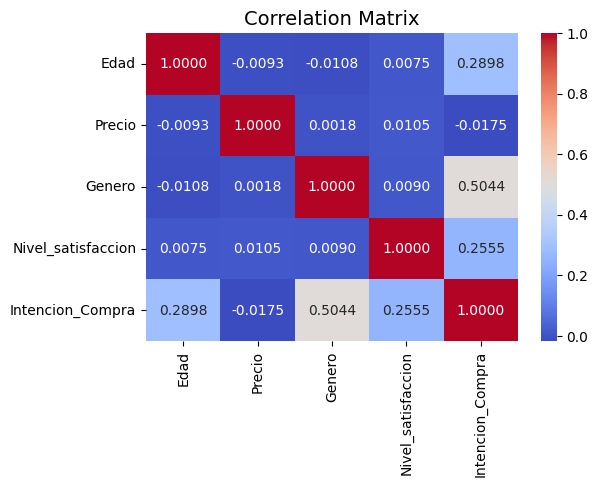

In [431]:
filter = df_2[['Edad', 'Precio','Genero','Nivel_satisfaccion','Intencion_Compra']].corr()   # Select columns of DataFrame

# Heatmap visualization
plt.figure(figsize=(6, 4))                                              # Adjust the figure size
sns.heatmap(filter, annot=True, cmap='coolwarm', fmt=".4f", cbar=True)  # Showing decimals
plt.title('Correlation Matrix', fontsize=14)                            # Assigning a title

plt.show()

***NIVEL DE CORRELACIÓN***

Interpretación 1: El grado de asociación que existe entre el Género y la Intención de compra de los productos presenta el 50.44%.

Interpretación 2: El grado de asociación que existe entre la Edad y la Intención de compra de los productos presenta el 28.98%.

Interpretación 3: El grado de asociación que existe entre el Nivel de satisfacción y la Intención de compra de los productos presenta el 25.55%.



---

